In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_csv('dataset_group.csv')

In [4]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [7]:
df.duplicated().sum()

4730

In [8]:
df['Product'] = df['Product'].str.lower()

In [9]:
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


In [10]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [11]:
df = df.drop(df[df.Product == 'none'].index)

In [12]:
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


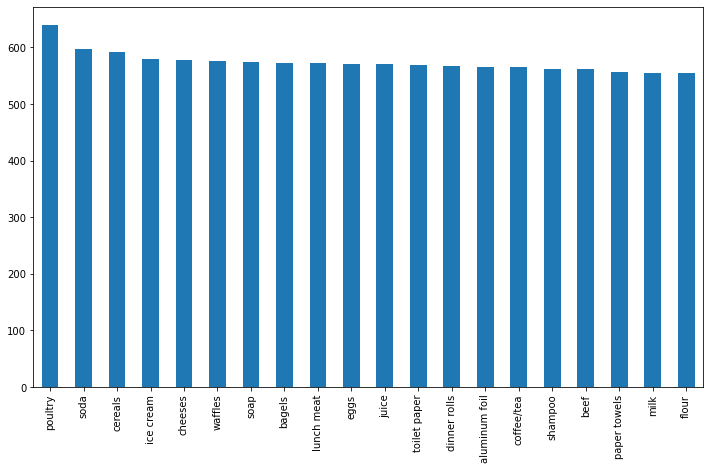

In [13]:
df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [14]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [15]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [16]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [17]:
basket=basket.applymap(encode_zero_one)

In [18]:
itemsets = apriori(basket, min_support = 0.01, use_colnames = True, low_memory=True)
itemsets

C:\Users\Sumit\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(soda, sandwich bags, mixes, ketchup, soap, po..."
610568,0.011414,"(soda, sandwich bags, mixes, ketchup, soap, wa..."
610569,0.010536,"(laundry detergent, sandwich loaves, soda, soa..."
610570,0.011414,"(sandwich bags, mixes, yogurt, shampoo, milk, ..."


C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


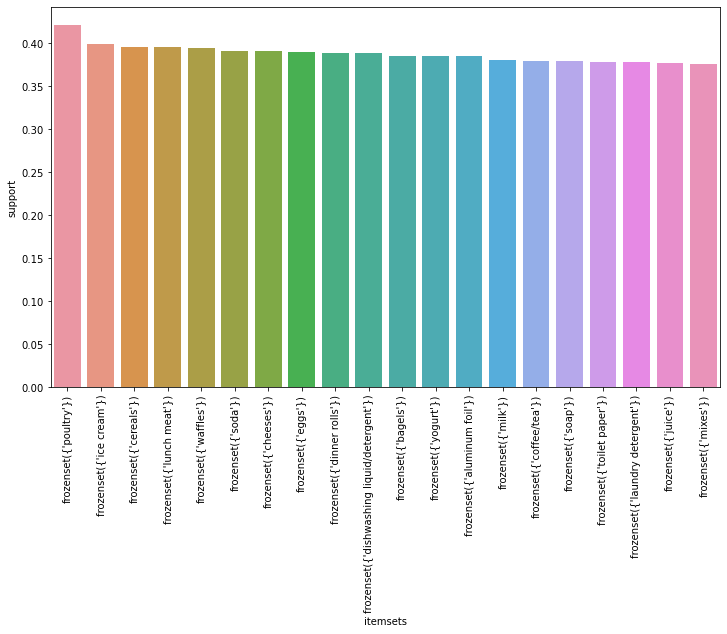

In [19]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [20]:
basket = association_rules(itemsets, metric ="lift") 

In [23]:
basket = basket.sort_values(['lift','confidence'], ascending =[False, False])

In [26]:
basket.head(20)

ERROR! Session/line number was not unique in database. History logging moved to new session 540


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21916471,"(sugar, ketchup, all- purpose, sandwich bags)","(soap, laundry detergent, flour)",0.023705,0.058824,0.011414,0.481481,8.185185,0.010019,1.815126
21916510,"(soap, laundry detergent, flour)","(sugar, ketchup, all- purpose, sandwich bags)",0.058824,0.023705,0.011414,0.194030,8.185185,0.010019,1.211329
21907013,"(coffee/tea, toilet paper, all- purpose, fruits)","(beef, cereals, butter)",0.022827,0.058824,0.010536,0.461538,7.846154,0.009193,1.747899
21907068,"(beef, cereals, butter)","(coffee/tea, toilet paper, all- purpose, fruits)",0.058824,0.022827,0.010536,0.179104,7.846154,0.009193,1.190374
22026351,"(individual meals, pork, ice cream, milk)","(shampoo, sandwich loaves, cereals)",0.020193,0.067603,0.010536,0.521739,7.717674,0.009170,1.949557
22026374,"(shampoo, sandwich loaves, cereals)","(individual meals, pork, ice cream, milk)",0.067603,0.020193,0.010536,0.155844,7.717674,0.009170,1.160694
22029865,"(cheeses, ketchup, lunch meat, milk)","(soap, coffee/tea, pork)",0.022827,0.065847,0.011414,0.500000,7.593333,0.009910,1.868306
22029916,"(soap, coffee/tea, pork)","(cheeses, ketchup, lunch meat, milk)",0.065847,0.022827,0.011414,0.173333,7.593333,0.009910,1.182064
21916465,"(sugar, laundry detergent, ketchup, all- purpose)","(soap, flour, sandwich bags)",0.025461,0.059701,0.011414,0.448276,7.508621,0.009893,1.704291
21916516,"(soap, flour, sandwich bags)","(sugar, laundry detergent, ketchup, all- purpose)",0.059701,0.025461,0.011414,0.191176,7.508621,0.009893,1.204885
